# Creation of Machine Learning Models

In [35]:
# Libraries for data manipulation and splitting datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Libraries for model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Library for model explainability
import shap

In [36]:
# Load dataset

df_final = pd.read_csv("df_encoded.csv")

In [37]:
# Save CLIENTNUM and Attrition_Flag for later reference
client_ids = df_final[['CLIENTNUM', 'Attrition_Flag']]

In [38]:
# Drop non-predictive columns
df_final = df_final.drop(columns=['Attrition_Flag', 'CLIENTNUM'])

In [39]:
df_final.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,target
0,-0.165406,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.973895,3.834003,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.333570,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-1.357340,12.608573,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,0.583058,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-1.911206,6.807864,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,-0.789126,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-1.911206,6.807864,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,-0.789126,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.570365,7.509325,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


### Features and Target Separation

In [40]:
# Define features and target

X = df_final.drop(columns=['target'])
y = df_final['target']

In [41]:
X.shape

(10127, 34)

In [42]:
y.shape

(10127,)

In [43]:
y.value_counts(normalize=True)

target
0    0.83934
1    0.16066
Name: proportion, dtype: float64

In [44]:
y.value_counts(normalize=False)

target
0    8500
1    1627
Name: count, dtype: int64

### Logistic Regression Model
Train and evaluate a baseline Logistic Regression model

In [45]:
# Split dataset into training and testing (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialise and train logistic regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logistic_model.predict(X_test)
print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy Logistic Regression: 0.89
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1701
           1       0.75      0.49      0.60       325

    accuracy                           0.89      2026
   macro avg       0.83      0.73      0.77      2026
weighted avg       0.88      0.89      0.88      2026



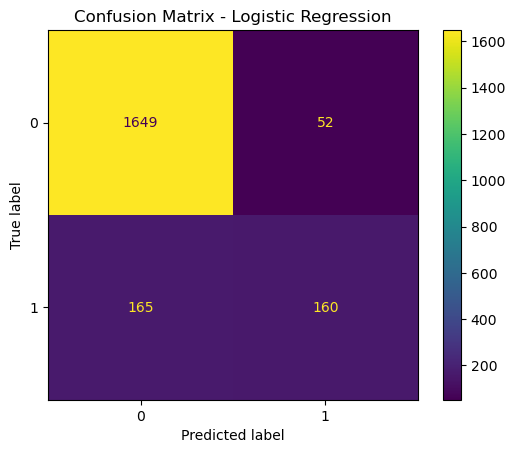

In [46]:
# Confusion Matrix Logistic Regression
cm_log = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Random Forest Classifier
Train a Random Forest model to improve detection of churn

In [47]:
# Define the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

classification_report_text = classification_report(y_test, predictions)
print(classification_report_text)

Accuracy: 0.9269
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1701
           1       0.87      0.64      0.74       325

    accuracy                           0.93      2026
   macro avg       0.90      0.81      0.85      2026
weighted avg       0.92      0.93      0.92      2026



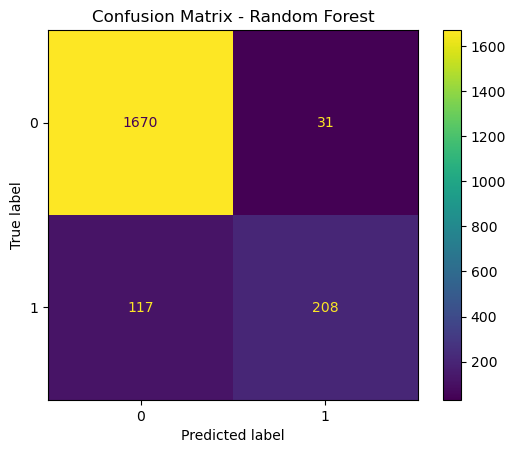

In [48]:
# Confusion Matrix - Random Forest

confusion_matrix_randomforest = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix_randomforest).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

### XGBoost Classifier
Train XGBoost for better accuracy and recall.

In [49]:
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)

predictions = xgboost_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1701
           1       0.87      0.71      0.79       325

    accuracy                           0.94      2026
   macro avg       0.91      0.85      0.87      2026
weighted avg       0.94      0.94      0.93      2026



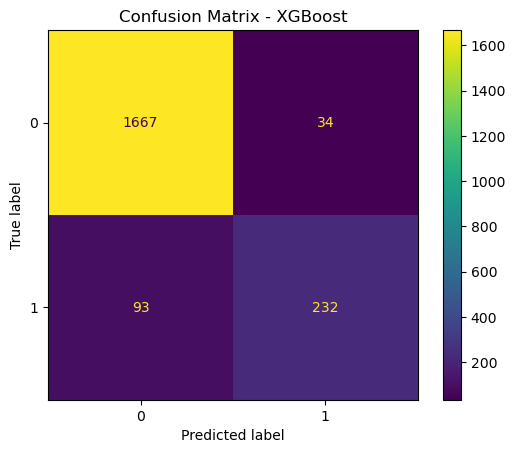

In [50]:
# Confusion Matrix - XGBoost
confusion_matrix_xgboost = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix_xgboost).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

### Predictions for Active Customers
Generate churn scores for active customers.

In [51]:
# Filter active customers
existing_customers_mask = client_ids['Attrition_Flag'] == 'Existing Customer'
X_existing_customers = X.loc[existing_customers_mask]
client_ids_existing = client_ids.loc[existing_customers_mask, 'CLIENTNUM']

# Check indices alignment
assert (X_existing_customers.index == client_ids_existing.index).all()

churn_probabilities = xgboost_model.predict_proba(X_existing_customers)[:, 1]

# Create DataFrame with results
results_existing_customers = pd.DataFrame({'CLIENTNUM': client_ids_existing.values,'Churn_Score': churn_probabilities})

In [52]:
results_existing_customers.head()

,CLIENTNUM,Churn_Score
0,768805383,0.000025
1,818770008,0.000027
2,713982108,0.000348
3,769911858,0.000612
4,709106358,0.000104


In [53]:
# Save Churn Score in CSV 

results_existing_customers.to_csv('churn_score_active.csv', index=False)

### Model Interpretation with SHAP
Use SHAP to understand key features driving churn predictions.

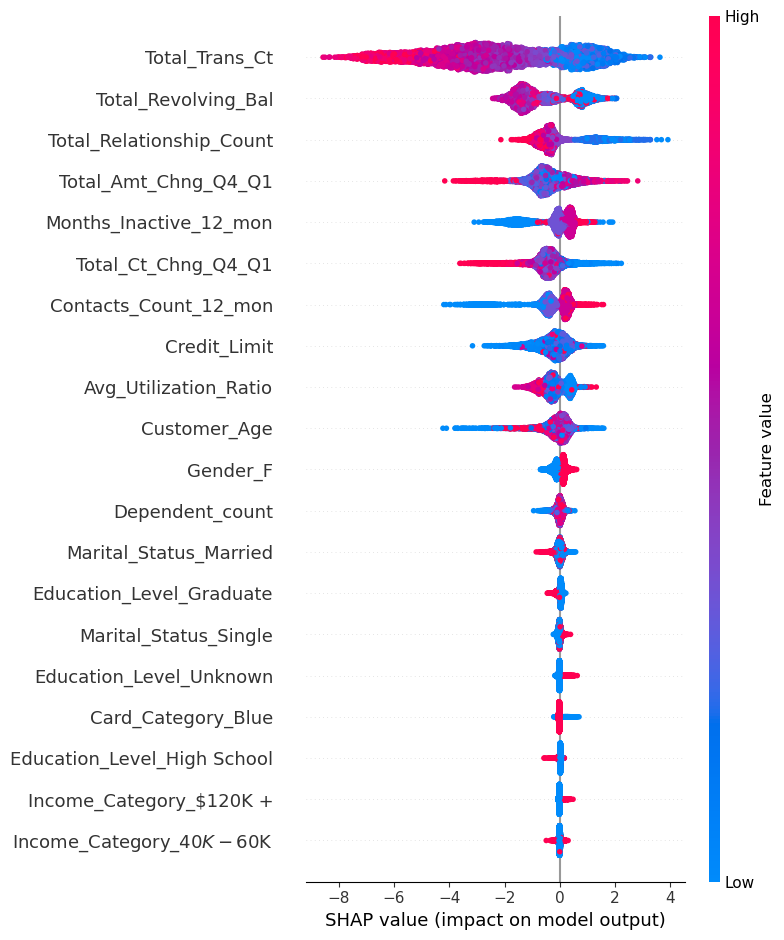

In [54]:
# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(xgboost_model)
shap_values_existing = explainer(X_existing_customers)

# Global SHAP summary plot
shap.summary_plot(shap_values_existing, X_existing_customers)

In [55]:
# Save SHAP values in DataFrame (Pivoted)

shap_df = pd.DataFrame(shap_values_existing.values, columns=X_existing_customers.columns)

shap_df['CLIENTNUM'] = client_ids_existing.values

In [56]:
#  Checking that Index is working correctly

print(all(shap_df['CLIENTNUM'].values == results_existing_customers['CLIENTNUM'].values))

True


In [57]:
# Shap Results to CSV

shap_df.to_csv('shap_values_pivoted.csv', index=False)